In [1]:
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
plt.style.use('ggplot')

In [2]:
direc_save='/home/samuel/Documents/warwickMathSys/MSc Project/code/Plots/'

direc0='/home/samuel/Documents/warwickMathSys/MSc Project/data/bank of england/'
direc1='/home/samuel/Documents/warwickMathSys/MSc Project/data/FRED/'

direc2='/home/samuel/Documents/warwickMathSys/MSc Project/data/'

direc='/home/samuel/Documents/warwickMathSys/MSc Project/data/WID/'


M0_sa=direc1+'M0UK.csv' #bank of england says M0 discontinued 2006..
M1_sa=direc1+'M1UK.csv'
M2_sa=direc1+'M2UK.csv'
M3_sa=direc1+'M3UK.csv'
M4_sa=direc0+'M4quarterlysa.csv'


RealGDPsa=direc1+'RealGDPUKsa.csv'
GDPsa=direc1+'GDPUKsa.csv'

Ineq=direc+'1pp_share.csv'

In [3]:
dataM4=pd.read_csv(M4_sa)
dataM4=dataM4.values
xM4=dataM4[:,0]
yM4=dataM4[:,1]
yM4=yM4.astype(np.float)

dataNGDP=pd.read_csv(GDPsa)
dataNGDP=dataNGDP.values
xNGDP=dataNGDP[:,0]
yNGDP=dataNGDP[:,1]
yNGDP=yNGDP.astype(np.float)

Velocity V4 from Mar 1963 - Dec 2017 (months off slightly), quarterly to 1963-2014 yearly (take March as
years)

In [4]:
print('No of values for M4 is', len(xM4))
xM4[0:24][::-1] #M4 dates March 1963 to December 1968 quarterly
xM4[25:221][::-1] #M4 dates March 1969 to December 2017 quarterly
M4_dates=np.concatenate((xM4[0:24][::-1] ,xM4[25:221][::-1])) #Combine M4 dates March 1963 to December 2017 quarterly
#print(M4_dates)
M4=np.concatenate((yM4[0:24][::-1] ,yM4[25:221][::-1])) #M4 values March 1963 to December 2017 quarterly

No of values for M4 is 221


In [5]:
t=np.arange(0,4*52,4)
M4_yearly=M4_dates[t]
M4_yearly=np.concatenate((M4_yearly[0:17],M4_yearly[18:len(M4_yearly)]))
len(M4_yearly)

51

In [6]:
xNGDP
NGDP=yNGDP

In [7]:
NGDPM4=NGDP[32:len(NGDP)-1]
V4=NGDPM4/M4
datesV4=np.arange(1963,2018,0.25)
V4=V4[t]
V4=np.concatenate((V4[0:17],V4[18:len(V4)]))
dates=np.arange(1963,2015,1)
dates=np.concatenate((dates[0:17],dates[18:len(dates)]))
dates
#print(len(dates))

array([1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014])

# Wealth and Velocity

Inequality data (top 1% wealth share) 1963-2014 excluding 1980, yearly

In [8]:
data=pd.read_csv(Ineq, delimiter=';')
data=data.values
data1=[]
for x in filter(lambda v: v==v, data):
    #print(x[0])
    data1.append(x[0])
l=len(data1)
data=data1[1:l]

data=np.asarray(data)

data = data.astype(np.float)*100


wealth_share=data[15:66]
len(wealth_share)
print(len(wealth_share))

51


Text(0.5,1,'Top 1% Fiscal Income Share, 1963-2014 (missing 1980)')

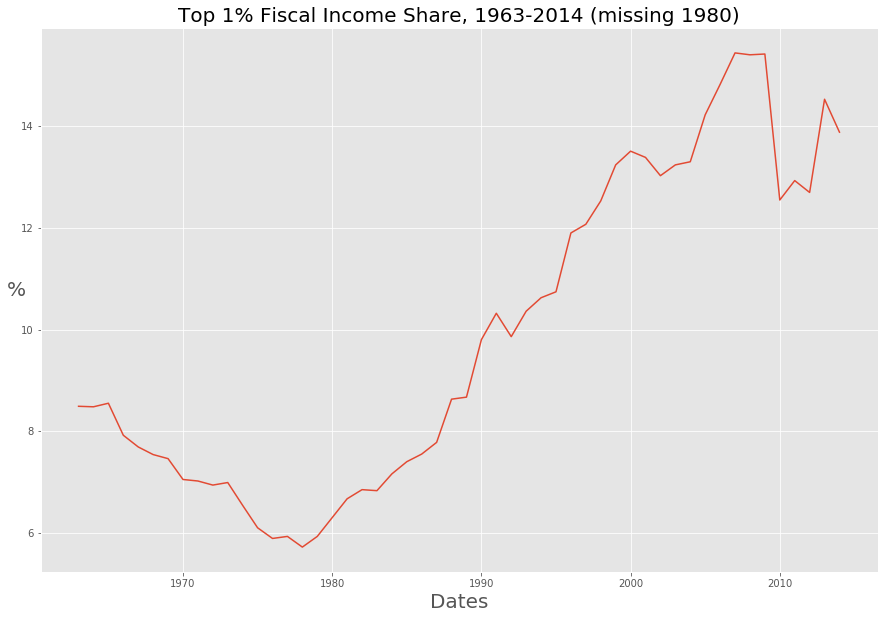

In [9]:
plt.figure(figsize=(15,10))
plt.plot(dates,wealth_share)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('%', fontsize=20,rotation=0)
plt.title('Top 1% Fiscal Income Share, 1963-2014 (missing 1980)', fontsize=20)

Text(0.5,1,'V4, 1963-2014 (missing 1980)')

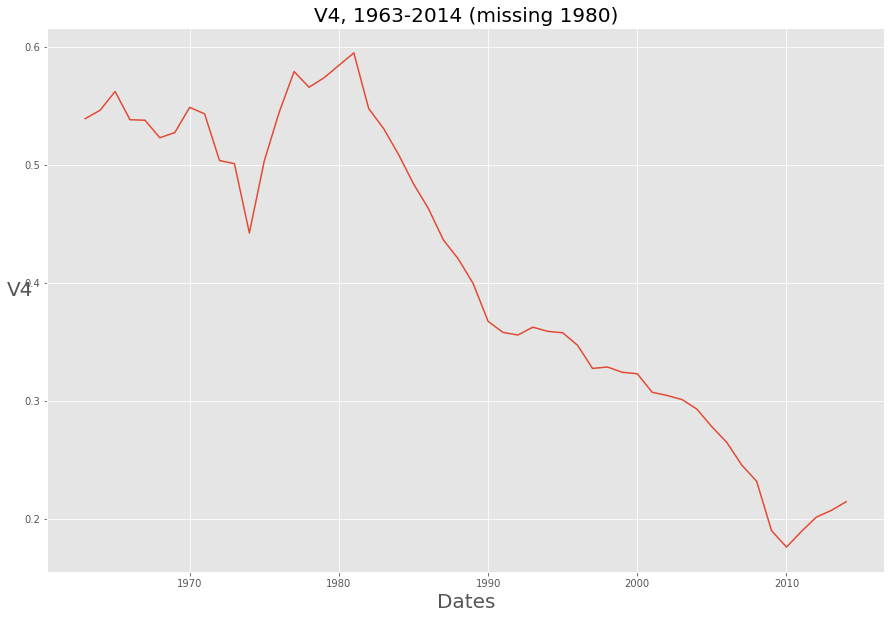

In [10]:
plt.figure(figsize=(15,10))
plt.plot(dates,V4)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('V4', fontsize=20,rotation=0)
plt.title('V4, 1963-2014 (missing 1980)', fontsize=20)

In [11]:
wealth_share1=wealth_share/100
wealth_share1

array([0.0849    , 0.0848    , 0.0855    , 0.0792    , 0.0769    ,
       0.0754    , 0.0746    , 0.0705    , 0.0702    , 0.0694    ,
       0.0699    , 0.0654    , 0.061     , 0.0589    , 0.0593    ,
       0.0572    , 0.0593    , 0.0667    , 0.0685    , 0.0683    ,
       0.0716    , 0.074     , 0.0755    , 0.0778    , 0.0863    ,
       0.0867    , 0.09800511, 0.1032    , 0.09860128, 0.1036    ,
       0.10625443, 0.10742279, 0.119     , 0.12070636, 0.1252992 ,
       0.13238596, 0.13508714, 0.13386209, 0.13026521, 0.13238942,
       0.13300377, 0.14223832, 0.14822273, 0.15441849, 0.15404682,
       0.1542    , 0.12548178, 0.1293    , 0.126969  , 0.1453    ,
       0.13882713])

Plot of V4 against top 1% income share

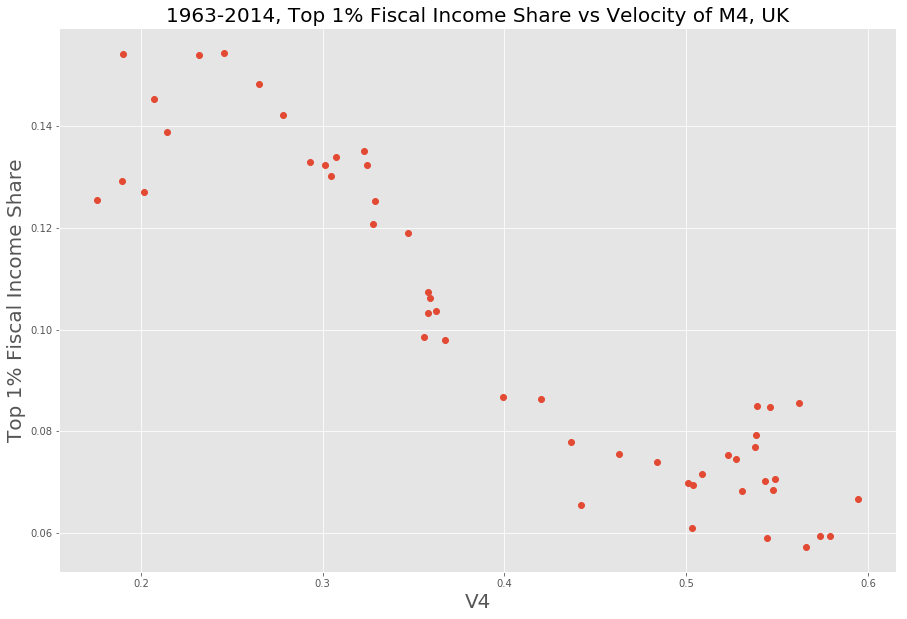

In [12]:
plt.figure(figsize=(15,10))
plt.plot(V4,wealth_share1,'o')
plt.title('1963-2014, Top 1% Fiscal Income Share vs Velocity of M4, UK',fontsize=20)
plt.xlabel('V4', fontsize=20)
plt.ylabel('Top 1% Fiscal Income Share', fontsize=20)

plt.savefig(direc_save+'wealth_velocity1963-2014')

In [45]:
wealth_share1963_1979=wealth_share[0:17]
V4_1963_1979=V4[0:17]
print(len(wealth_share1963_1979),len(V4_1963_1979))

wealth_share1981_2009=wealth_share[17:46]
V4_1981_2009=V4[17:46]
print(len(wealth_share1981_2009),len(V4_1981_2009))

wealth_share1981_2009n=wealth_share1981_2009

wealth_share1981_1990=wealth_share[17:27]
V4_1981_1990=V4[17:27]
print(len(wealth_share1981_1990),len(V4_1981_1990))

wealth_share1991_2009=wealth_share[27:46]
V4_1991_2009=V4[27:46]
print(len(wealth_share1991_2009),len(V4_1991_2009))

wealth_share2010_2014=wealth_share[46:len(wealth_share)]
V4_2010_2014=V4[46:len(V4)]
print(len(wealth_share2010_2014),len(V4_2010_2014))

17 17
29 29
10 10
19 19
5 5


In [46]:
print(wealth_share, '\n')
print(wealth_share1963_1979, '\n')
print(wealth_share1981_2009, '\n')
print(wealth_share1981_1990, '\n')
print(wealth_share1991_2009, '\n')
print(wealth_share2010_2014, '\n')

[ 8.49        8.48        8.55        7.92        7.69        7.54
  7.46        7.05        7.02        6.94        6.99        6.54
  6.1         5.89        5.93        5.72        5.93        6.67
  6.85        6.83        7.16        7.4         7.55        7.78
  8.63        8.67        9.80051144 10.31999994  9.86012795 10.35999999
 10.62544335 10.74227947 11.89999995 12.07063625 12.52991991 13.23859572
 13.50871382 13.38620887 13.02652078 13.23894204 13.30037658 14.22383155
 14.82227262 15.4418488  15.40468194 15.42000012 12.54817751 12.93000011
 12.69690014 14.52999987 13.88271345] 

[8.49 8.48 8.55 7.92 7.69 7.54 7.46 7.05 7.02 6.94 6.99 6.54 6.1  5.89
 5.93 5.72 5.93] 

[ 6.67        6.85        6.83        7.16        7.4         7.55
  7.78        8.63        8.67        9.80051144 10.31999994  9.86012795
 10.35999999 10.62544335 10.74227947 11.89999995 12.07063625 12.52991991
 13.23859572 13.50871382 13.38620887 13.02652078 13.23894204 13.30037658
 14.22383155 14.82227262

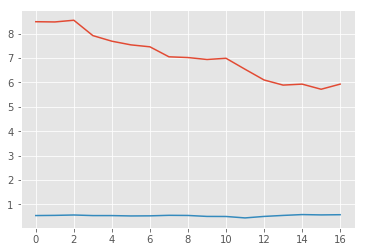

In [47]:
plt.plot(wealth_share1963_1979)
plt.plot(V4_1963_1979)

Text(0,0.5,'Top 1% Fiscal Income Share')

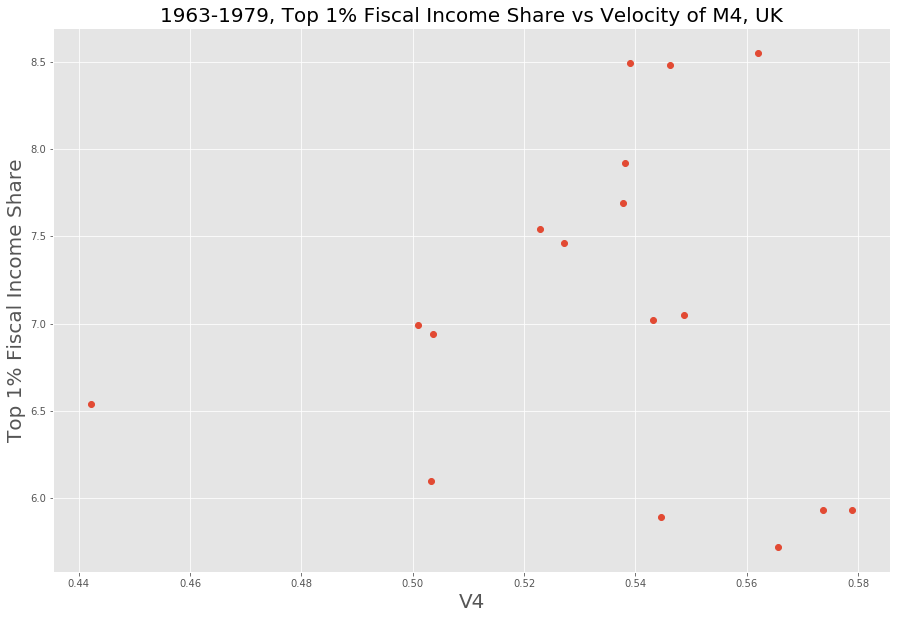

In [48]:
plt.figure(figsize=(15,10))
plt.plot(V4_1963_1979,wealth_share1963_1979,'o')
plt.title('1963-1979, Top 1% Fiscal Income Share vs Velocity of M4, UK',fontsize=20)
plt.xlabel('V4', fontsize=20)
plt.ylabel('Top 1% Fiscal Income Share', fontsize=20)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

[  0.34549111 -24.67252762   0.08888589   0.06907469]
[[ 1.90767670e-05 -3.81327973e-03 -8.91998000e-06 -2.24739342e-06]
 [-3.81327973e-03  7.82297816e+00  1.10403726e-02 -3.40140382e-03]
 [-8.91998000e-06  1.10403726e-02  2.23063725e-05 -6.80042741e-06]
 [-2.24739342e-06 -3.40140382e-03 -6.80042741e-06  4.28438714e-06]]
a=0.09, b=0.06907468630619512


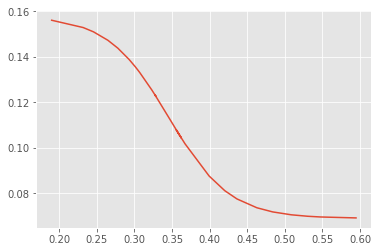

In [49]:
from scipy.optimize import curve_fit

wealth_share1981_2009=wealth_share[17:46]/100
V4_1981_2009=V4[17:46]

def sigmoid(x, x0, k,a,b):
    y = a/ (1 + np.exp(-k*(x-x0)))+b
    return y

popt, pcov = curve_fit(sigmoid, V4_1981_2009, wealth_share1981_2009,p0=[0.1 , 0.1 , 0.1, 0.1])
print(popt)
print(pcov)
x0=round(popt[0],2)
k=round(popt[1],2)
a=round(popt[2],2)
b=round(popt[3],2)

y_nl = sigmoid(V4_1981_2009, *popt)
# y
# V4_1981_2009



plt.plot(V4_1981_2009,y_nl)
# V4_1981_2009
# wealth_share1981_2009
print(f'a={a}, b={popt[3]}')


In [50]:
def quadratic(x, a, b,c):
    y =a*x**2+b*x+c
    return y

popt, pcov = curve_fit(quadratic, V4_1981_2009, wealth_share1981_2009,p0=[ 0 , 0, 0])
print(popt)
print(pcov)
y1981_2009 = quadratic(V4_1981_2009, *popt)

[ 0.4432763  -0.63192952  0.27834686]
[[ 0.01701165 -0.01344335  0.00248269]
 [-0.01344335  0.01084951 -0.00204462]
 [ 0.00248269 -0.00204462  0.00039469]]


In [51]:
regr = linear_model.LinearRegression()
V4_1981_2009=V4_1981_2009.reshape(-1,1)

wealth_share1981_2009=wealth_share1981_2009.reshape(-1,1)
regr.fit(V4_1981_2009,wealth_share1981_2009)
b_l=regr.coef_
a_l=regr.intercept_
print(a_l)
print(b_l)
y_l=a_l+b_l*V4_1981_2009
a_l=round(a_l[0],2)
b_l=round(b_l[0][0],2)

[0.21365479]
[[-0.28163335]]


Gaussian process fit with squared exponential kernel
http://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html
http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html

In [52]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel = RBF(5, (0.5,100))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9,normalize_y=True)

gp.fit(V4_1981_2009, wealth_share1981_2009)


x1 = np.atleast_2d(np.linspace(0.19,0.595, 100)).T
x2 = V4_1981_2009
y_pred1, sigma1 = gp.predict(x1, return_std=True)
y_pred2, sigma2 = gp.predict(x2, return_std=True)




/home/samuel/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


In [53]:
def squared_dif(x,y):
    d=np.sqrt(sum((x-y)**2))
    return d[0]

d=[]

for i in np.arange(1,10,0.1):
    kernel = RBF(100, (i,100))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
    gp.fit(V4_1981_2009, wealth_share1981_2009)
    y_pred, sigma = gp.predict(V4_1981_2009, return_std=True)
    d.append(squared_dif(wealth_share1981_2009,y_pred))


/home/samuel/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


In [54]:
#d

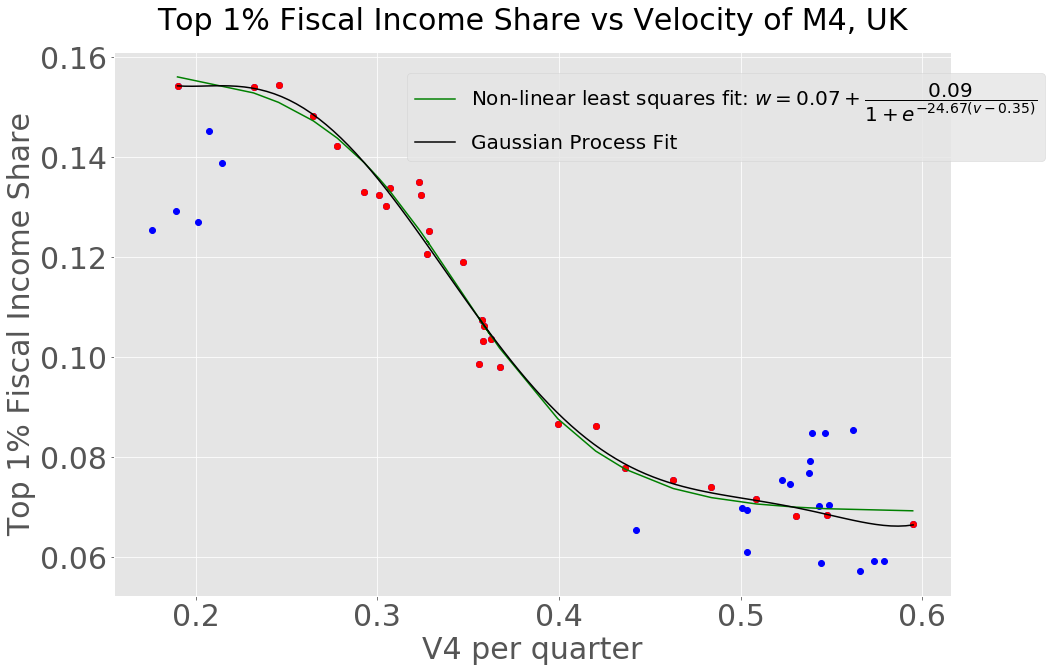

In [55]:
plt.figure(figsize=(15,10))
plt.plot(V4,wealth_share/100,'o',color='blue')
plt.plot(V4_1981_2009,wealth_share1981_2009,'o',color='red')
plt.plot(V4_1981_2009,y_nl,color='green',label=r'Non-linear least squares fit: $w=%a+\dfrac{%a}{1+e^{%a(v-%a)}}$'%(b,a,k,x0))
#plt.plot(V4_1981_2009,y_l,label='Linear regression: $w=%a %av$'%(a_l,b_l))
#plt.plot(V4_1981_2009,y1981_2009, label='Quadratic fit') quadratic fit not a good fit
plt.plot(x1,y_pred1,label='Gaussian Process Fit',color='black')
#plt.plot(x2,y_pred2,color='red')
plt.title('Top 1% Fiscal Income Share vs Velocity of M4, UK',fontsize=30,y=1.03)
plt.xlabel('V4 per quarter', fontsize=30)
plt.ylabel('Top 1% Fiscal Income Share', fontsize=30)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.legend(loc=(0.35,0.8),fontsize=20)
plt.savefig(direc_save+'wealth_velocity1981-2009_regression')

In [24]:
np.mean(wealth_share1981_2009)

0.11060721072004136

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

Calculating coefficient of determinations (R squared) for the two fits for income share and velocity between 1981 and 2009

In [25]:
from sklearn.metrics import r2_score

r2_nl = r2_score(y_nl, wealth_share1981_2009)
r2_l=r2_score(y_l,wealth_share1981_2009)
r2_gp=r2_score(y_pred2,wealth_share1981_2009)

print('R squared for linear fit:', r2_l)
print('R squared for non-linear fit:', r2_nl)
print('R squared for GP fit:', r2_gp)

R squared for linear fit: 0.8930106922274302
R squared for non-linear fit: 0.981020825666912
R squared for GP fit: 0.9808918076605372


In [65]:
y_gauss=[]
for i in range(len(y_pred2)):
    y_gauss.append(y_pred2[i][0])
y_gauss

[0.0664285001681089,
 0.06853826943420764,
 0.06987746845566627,
 0.07132062193573412,
 0.07285551476393785,
 0.07467161695108708,
 0.07862038217586424,
 0.0823320198674589,
 0.08878623921059962,
 0.10221560107179876,
 0.10678447078549262,
 0.10788374947019812,
 0.10459962981854524,
 0.10633040784028318,
 0.10692866478216793,
 0.1123138437383711,
 0.12244139431145933,
 0.12183246464570012,
 0.12412600399562117,
 0.12475004879393574,
 0.13248576741767076,
 0.13374861952484546,
 0.13534231745739428,
 0.1388664125102475,
 0.1445335359881535,
 0.14852331107118127,
 0.15238236432065216,
 0.15379699150667486,
 0.15429342450675515]

In [66]:
from scipy import stats

pearson=stats.pearsonr(y_nl, wealth_share1981_2009n)  
spearman=stats.spearmanr(y_nl, wealth_share1981_2009n)

pearson1=stats.pearsonr(y_gauss, wealth_share1981_2009n)  
spearman1=stats.spearmanr(y_gauss, wealth_share1981_2009n)

print(pearson)
print(spearman,'\n')
print(pearson1)
print(spearman1,'\n')

(0.9906433897398258, 6.8006243647582015e-25)
SpearmanrResult(correlation=0.9817733990147782, pvalue=5.241103525028564e-21) 

(0.9905881364810719, 7.360870381025496e-25)
SpearmanrResult(correlation=0.9817733990147782, pvalue=5.241103525028564e-21) 



In [28]:
from scipy.optimize import curve_fit

wealth_share1981_1990=wealth_share[17:27]
V4_1981_1990=V4[17:27]

def sigmoid(x, x0, k,a,b):
    y = a/ (1 + np.exp(-k*(x-x0)))+b
    return y

popt, pcov = curve_fit(sigmoid, V4_1981_1990, wealth_share1981_1990,p0=[0 , 0 , 0, 0])
print(popt)
print(pcov)
y1981_1990 = sigmoid(V4_1981_1990, *popt)

[  0.214443    12.02274696 -24.67854654  31.07663856]
[[ 5.56416458e-01  7.68121965e+00  1.20332848e+02 -1.19974905e+02]
 [ 7.68121965e+00  1.09350157e+02  1.65192728e+03 -1.64660149e+03]
 [ 1.20332848e+02  1.65192728e+03  2.60515894e+04 -2.59751367e+04]
 [-1.19974905e+02 -1.64660149e+03 -2.59751367e+04  2.58989683e+04]]


Text(0,0.5,'Top 1% Fiscal Income Share')

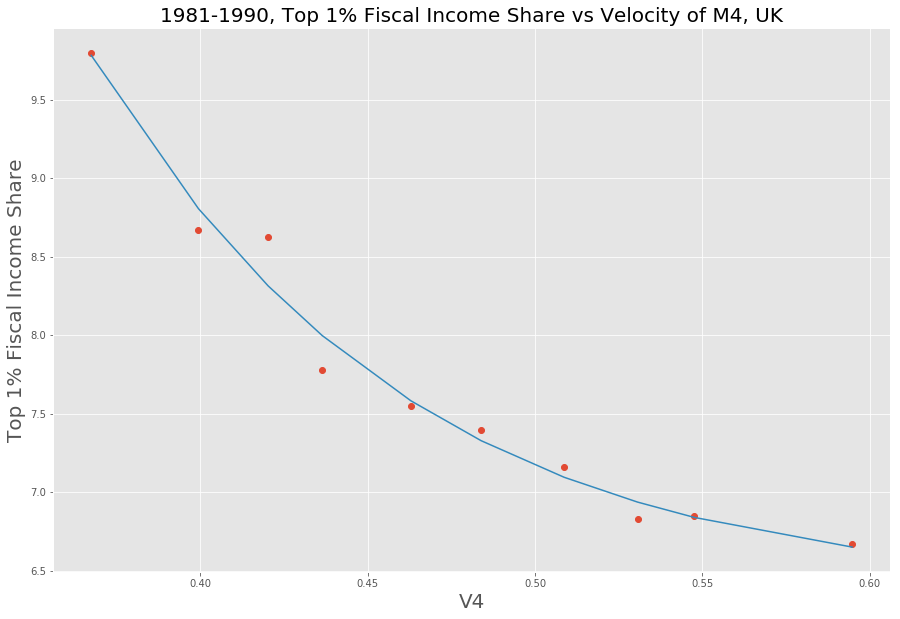

In [29]:
plt.figure(figsize=(15,10))
plt.plot(V4_1981_1990,wealth_share1981_1990,'o')
plt.plot(V4_1981_1990,y1981_1990)
plt.title('1981-1990, Top 1% Fiscal Income Share vs Velocity of M4, UK',fontsize=20)
plt.xlabel('V4', fontsize=20)
plt.ylabel('Top 1% Fiscal Income Share', fontsize=20)

In [30]:
from scipy.optimize import curve_fit

wealth_share1991_2009=wealth_share[27:46]
V4_1991_2009=V4[27:46]

def quadratic(x, a, b,c):
    y =a*x**2+b*x+c
    return y

popt, pcov = curve_fit(quadratic, V4_1991_2009, wealth_share1991_2009,p0=[ 0 , 0, 0])
print(popt)
print(pcov)
y1991_2009 = quadratic(V4_1991_2009, *popt)

[-213.29431907   88.12942619    6.39221673]
[[ 1837.07791714 -1056.80568689   147.10850102]
 [-1056.80568689   613.09420114   -86.21483255]
 [  147.10850102   -86.21483255    12.28138843]]


Text(0,0.5,'Top 1% Fiscal Income Share')

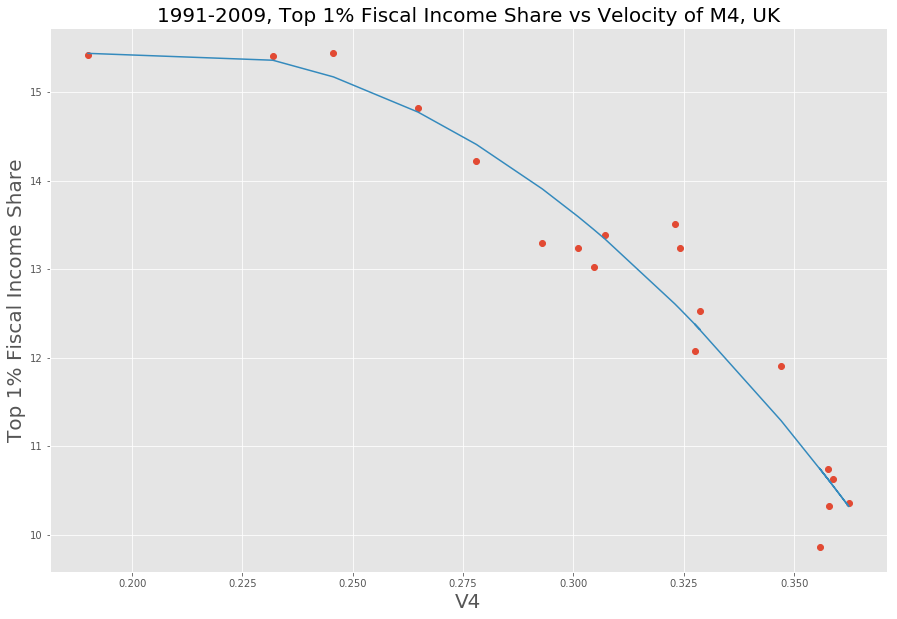

In [31]:
plt.figure(figsize=(15,10))
plt.plot(V4_1991_2009,wealth_share1991_2009,'o')
plt.plot(V4_1991_2009,y1991_2009)
plt.title('1991-2009, Top 1% Fiscal Income Share vs Velocity of M4, UK',fontsize=20)
plt.xlabel('V4', fontsize=20)
plt.ylabel('Top 1% Fiscal Income Share', fontsize=20)

Text(0,0.5,'Top 1% Fiscal Income Share')

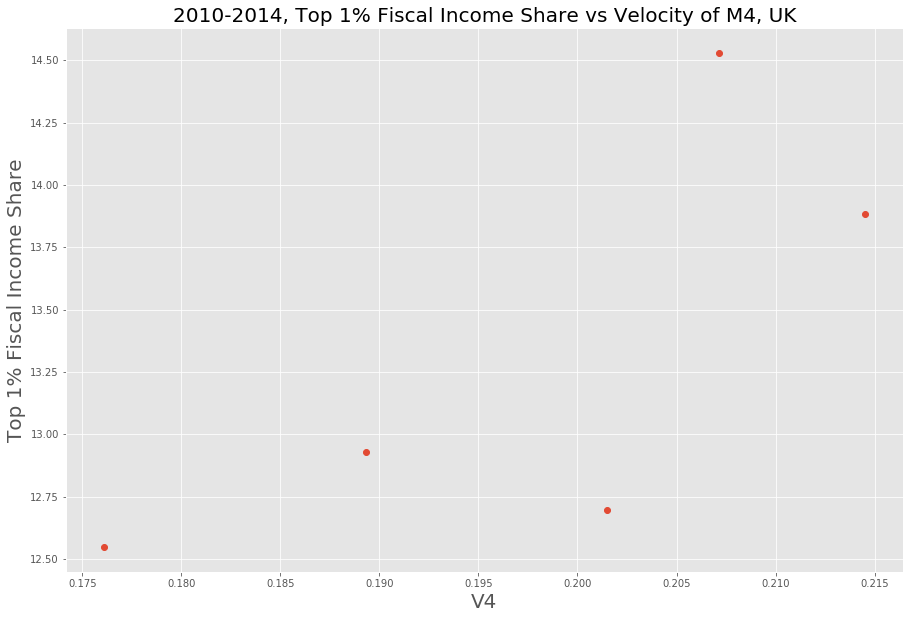

In [32]:
plt.figure(figsize=(15,10))
plt.plot(V4_2010_2014,wealth_share2010_2014,'o')
plt.title('2010-2014, Top 1% Fiscal Income Share vs Velocity of M4, UK',fontsize=20)
plt.xlabel('V4', fontsize=20)
plt.ylabel('Top 1% Fiscal Income Share', fontsize=20)

Correlations: pearson and spearman rank

In [33]:
from scipy import stats

In [34]:
pearson=stats.pearsonr(wealth_share,V4)  
spearman=stats.spearmanr(wealth_share,V4)

In [37]:
V4

array([0.53907044, 0.54623025, 0.56208948, 0.5381656 , 0.53774876,
       0.52288592, 0.52722611, 0.54865424, 0.54312683, 0.50360541,
       0.50091066, 0.44222533, 0.50328158, 0.54452721, 0.57894657,
       0.56567185, 0.57364482, 0.59476379, 0.54760153, 0.53061832,
       0.50870621, 0.48388654, 0.46289506, 0.43640911, 0.42022881,
       0.39940914, 0.36736502, 0.3579647 , 0.35576156, 0.36240527,
       0.35888043, 0.35767461, 0.34703986, 0.32746138, 0.32864412,
       0.32417392, 0.32294917, 0.30724256, 0.30454177, 0.30105344,
       0.29293451, 0.27801278, 0.26477362, 0.24562139, 0.23187462,
       0.18999448, 0.17608942, 0.1893179 , 0.20149141, 0.20713779,
       0.21451336])

In [35]:
print(pearson)
print(spearman,'\n')

(-0.9253737481970304, 2.7755877526096606e-22)
SpearmanrResult(correlation=-0.8898391368597995, pvalue=2.5420319084608504e-18) 



In [43]:
#function to find first differences in an vector

def time_dif(x):
    t=[]
    for i in range(len(x)-1):
        d=x[i+1]-x[i]
        t.append(d)
    return t

Text(0,0.5,'Change in V4')

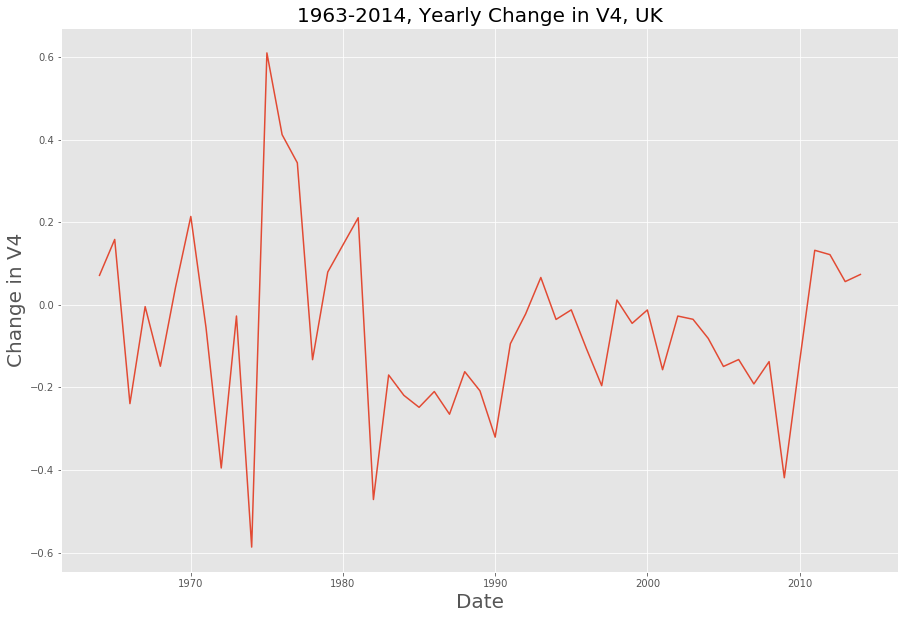

In [44]:
V4_dif=time_dif(V4)
dates=np.arange(1963,2015,1)
dates=np.concatenate((dates[0:17],dates[18:len(dates)]))
dates=dates[1:len(dates)]
plt.figure(figsize=(15,10))
plt.plot(dates,V4_dif)
plt.title('1963-2014, Yearly Change in V4, UK',fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Change in V4', fontsize=20)

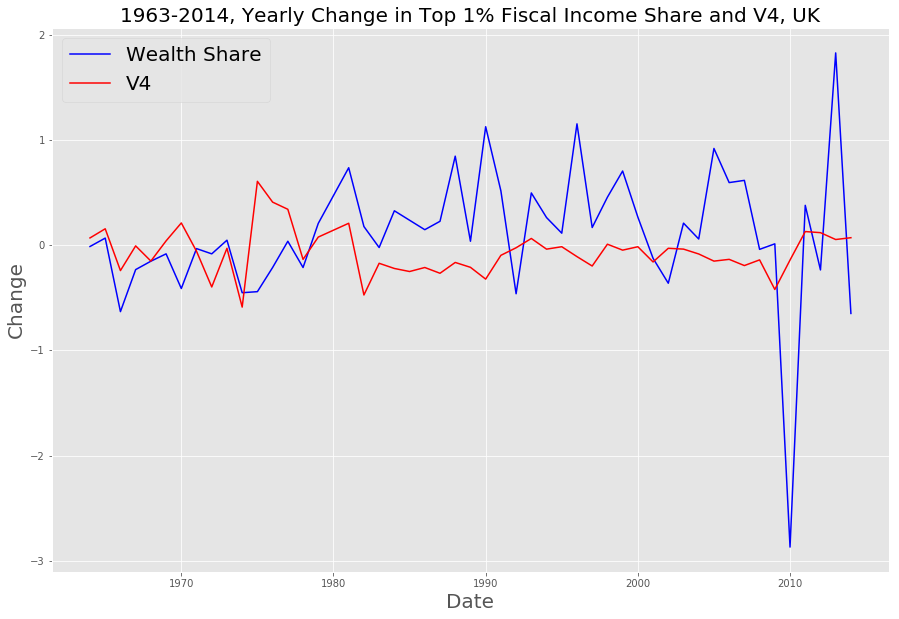

In [45]:
wealthshare_dif=time_dif(wealth_share)
dates=np.arange(1963,2015,1)
dates=np.concatenate((dates[0:17],dates[18:len(dates)]))
dates=dates[1:len(dates)]
plt.figure(figsize=(15,10))
plt.plot(dates,wealthshare_dif, color='blue')
plt.plot(dates,V4_dif, color='red')
plt.title('1963-2014, Yearly Change in Top 1% Fiscal Income Share and V4, UK',fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Change', fontsize=20)
plt.legend(loc='best',labels=['Wealth Share','V4'],fontsize=20)

In [34]:
pearson=stats.pearsonr(wealthshare_dif,V4_dif)  
spearman=stats.spearmanr(wealthshare_dif,V4_dif)

In [35]:
print(pearson)
print(spearman,'\n')

(-0.03841446706815555, 0.7911183150004809)
SpearmanrResult(correlation=-0.09969266242766502, pvalue=0.49093480305619364) 



https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

Autocorrelations

In [36]:
from statsmodels.tsa.stattools import acf, pacf

acf(V4,nlags=60)

/home/samuel/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


array([ 1.        ,  0.95245987,  0.89485254,  0.82728346,  0.76057264,
        0.68999943,  0.62316165,  0.56513356,  0.5048648 ,  0.44959813,
        0.40608748,  0.36513391,  0.33536228,  0.29355998,  0.24463856,
        0.19284622,  0.13701353,  0.0787584 ,  0.01266233, -0.04399044,
       -0.09824992, -0.15009345, -0.19914158, -0.25095085, -0.30029631,
       -0.3461464 , -0.38093678, -0.40615092, -0.426766  , -0.43929014,
       -0.44461296, -0.44232726, -0.43194236, -0.41423048, -0.38091325,
       -0.35678583, -0.33685755, -0.31597819, -0.30123286, -0.29453852,
       -0.29980941, -0.29111297, -0.2795785 , -0.25754394, -0.23063767,
       -0.2053684 , -0.17400932, -0.13717957, -0.10238154, -0.06423394,
       -0.03070148])

In [37]:
len(V4)
np.sqrt(2)/51

0.0277296776935901

 Autocorrelation coefficient with lag k
 
 $$r_k = \displaystyle
 \frac{\sum_{t=1}^{N-k} (x_t-\bar{x})(x_{t+1}-\bar{x})}{\sum_{t=1}^N(x_t-\bar{x})^2}$$

In [38]:
#Autocorrelation coefficient with lag time k
def auto_cor(x,k):
    x_bar=np.mean(x)
    N=len(x)
    z1=0
    z2=0
    for i in range(N):
        z1=z1+(x[i]-x_bar)**2
        
    for i in range(N-k):
        z2=z2+(x[i]-x_bar)*(x[i+k]-x_bar)
        
    r_k=z2/z1
    
    return r_k

In [39]:
#Funtion the puts autocorrelations for lags k=1,..,N/4
def AUT(x):
    N=len(x)
    AUT=[]
    for k in range(int(N/4)+1):
        AUT.append(auto_cor(x,k))
        
    return AUT
#print(len(AUT(V4)))

def AUT1(x):
    N=len(x)
    AUT=[]
    for k in range(int(N)):
        AUT.append(auto_cor(x,k))
        
    return AUT


Text(0,0.5,'$r_k$')

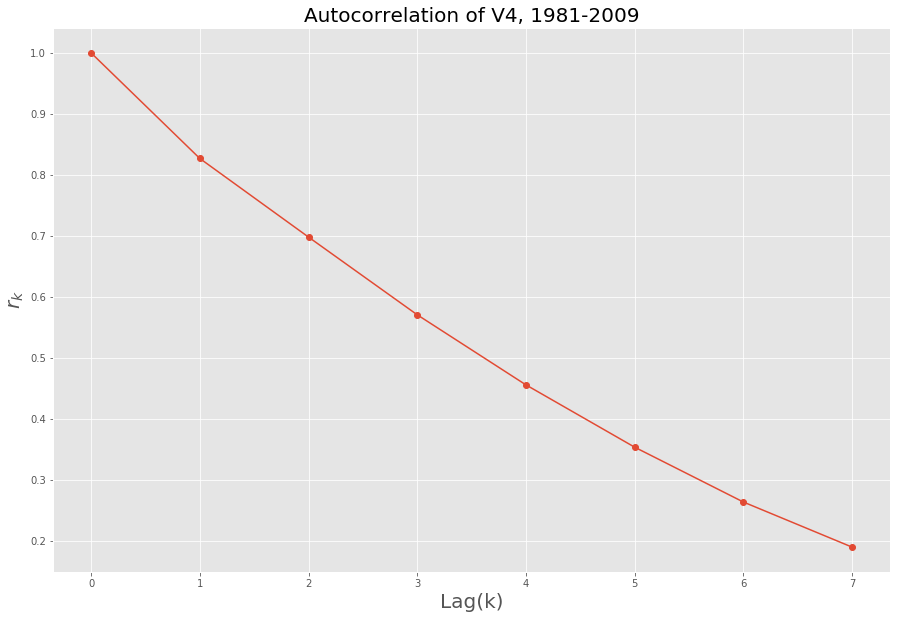

In [40]:
plt.figure(figsize=(15,10))
N=len(V4_1981_2009)
k=range(int(N/4)+1)
plt.plot(k,AUT(V4_1981_2009),'-o')
plt.title('Autocorrelation of V4, 1981-2009',fontsize=20)
plt.xlabel('Lag(k)', fontsize=20)
plt.ylabel(r'$r_k$', fontsize=20)

Text(0,0.5,'$r_k$')

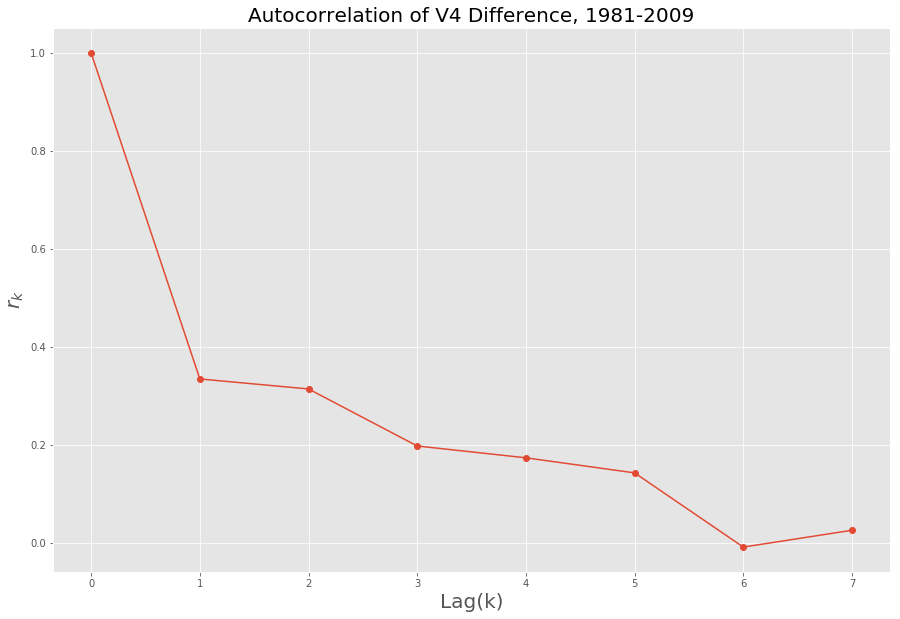

In [41]:
V41981_2009_dif=time_dif(V4_1981_2009)
plt.figure(figsize=(15,10))
N=len(V41981_2009_dif)
k=range(int(N/4)+1)
plt.plot(k,AUT(V41981_2009_dif),'-o')
plt.title('Autocorrelation of V4 Difference, 1981-2009',fontsize=20)
plt.xlabel('Lag(k)', fontsize=20)
plt.ylabel(r'$r_k$', fontsize=20)

Text(0,0.5,'$r_k$')

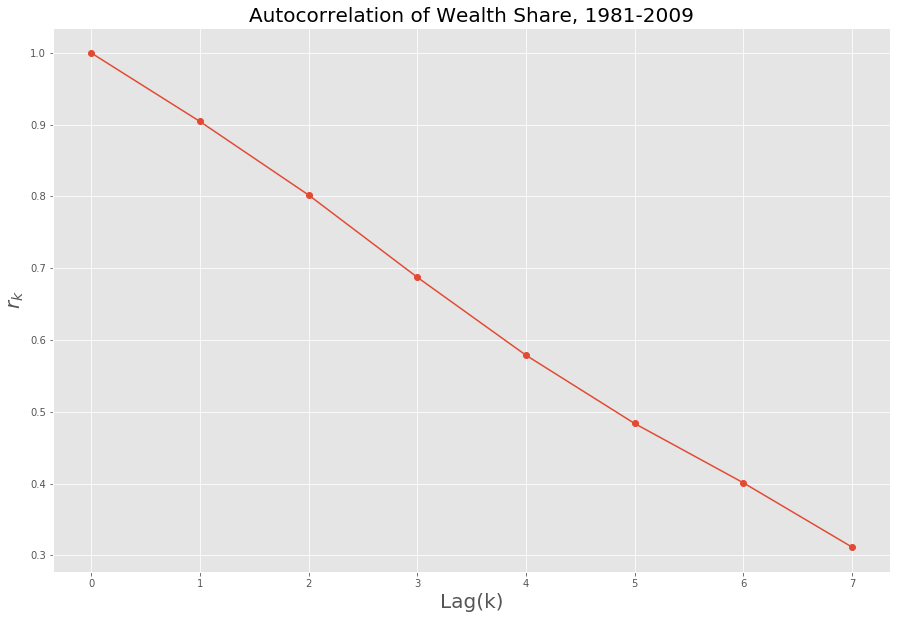

In [42]:
plt.figure(figsize=(15,10))
N=len(wealth_share1981_2009)
k=range(int(N/4)+1)
plt.plot(k,AUT(wealth_share1981_2009),'-o')
plt.title('Autocorrelation of Wealth Share, 1981-2009',fontsize=20)
plt.xlabel('Lag(k)', fontsize=20)
plt.ylabel(r'$r_k$', fontsize=20)

Text(0,0.5,'$r_k$')

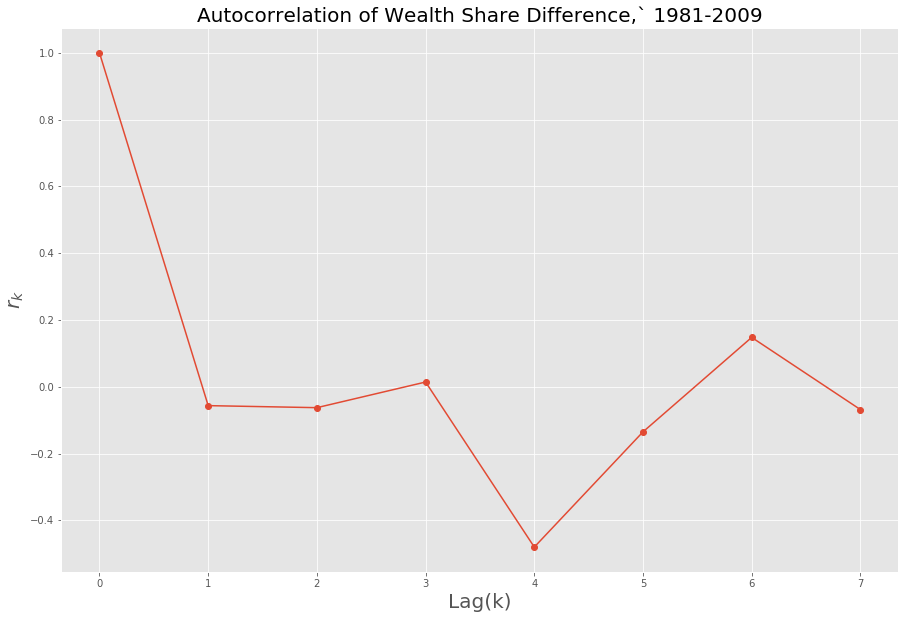

In [43]:
plt.figure(figsize=(15,10))
wealthshare1981_2009_dif=time_dif(wealth_share1981_2009)
N=len(wealthshare1981_2009_dif)
k=range(int(N/4)+1)
plt.plot(k,AUT(wealthshare1981_2009_dif),'-o')
plt.title('Autocorrelation of Wealth Share Difference,` 1981-2009',fontsize=20)
plt.xlabel('Lag(k)', fontsize=20)
plt.ylabel(r'$r_k$', fontsize=20)

Text(0,0.5,'$r_k$')

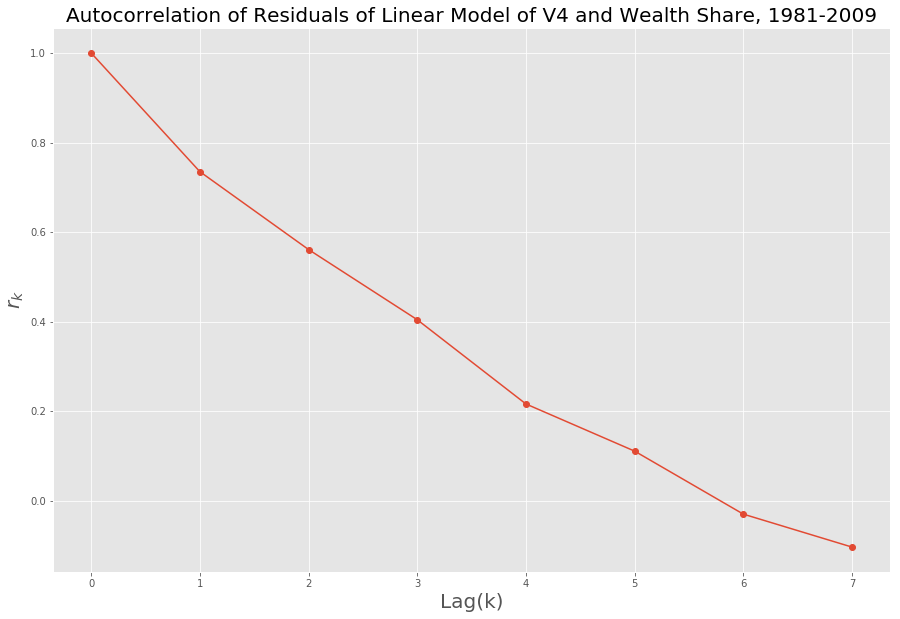

In [44]:
residuals=wealth_share1981_2009-y_l
plt.figure(figsize=(15,10))
N=len(residuals)
k=range(int(N/4)+1)
plt.plot(k,AUT(residuals),'-o')
plt.title('Autocorrelation of Residuals of Linear Model of V4 and Wealth Share, 1981-2009',fontsize=20)
plt.xlabel('Lag(k)', fontsize=20)
plt.ylabel(r'$r_k$', fontsize=20)

Durbin Watson test of autocorrelation from a regression analysis <br>
https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic  <br>

https://stackoverflow.com/questions/43322076/durbin-watson-statistic-for-one-dimensional-time-series-data

In [26]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residuals)

NameError: name 'residuals' is not defined

Text(0,0.5,'$r_k$')

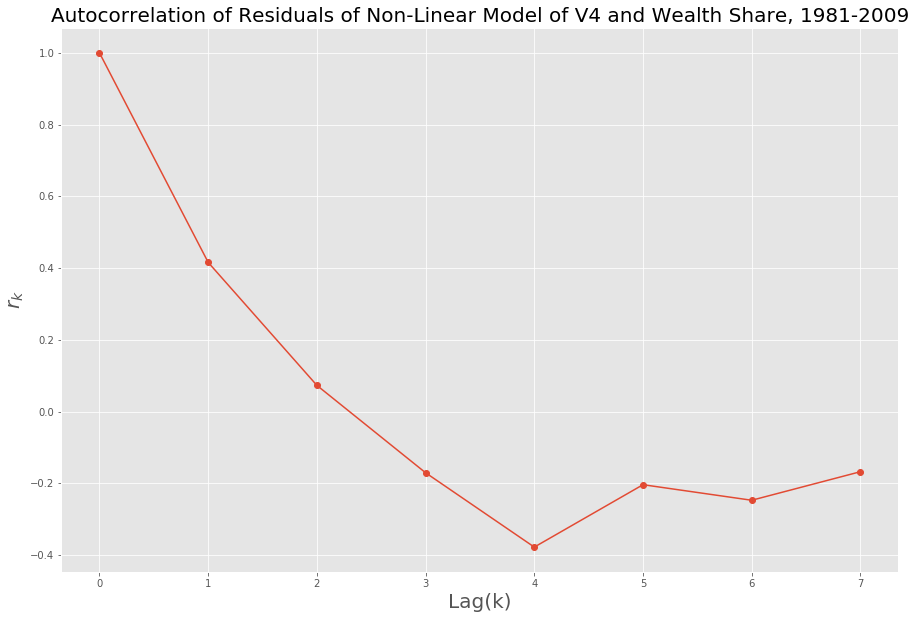

In [46]:
wealth_share1981_2009=wealth_share[17:46]
residuals_nl=wealth_share1981_2009-y_nl
plt.figure(figsize=(15,10))
N=len(residuals_nl)
k=range(int(N/4)+1)
plt.plot(k,AUT(residuals_nl),'-o')
plt.title('Autocorrelation of Residuals of Non-Linear Model of V4 and Wealth Share, 1981-2009',fontsize=20)
plt.xlabel('Lag(k)', fontsize=20)
plt.ylabel(r'$r_k$', fontsize=20)

In [37]:
from statsmodels.stats.stattools import durbin_watson
y_nl=np.reshape(y_nl,(29,1))
y_pred2=np.reshape(y_pred2,(29,1))
residuals_nl=wealth_share1981_2009-y_nl
residuals_gp=wealth_share1981_2009-y_pred2
print(durbin_watson(residuals_nl))
print(durbin_watson(residuals_gp))
print(len(residuals_nl))

[1.14514555]
[1.0742831]
29


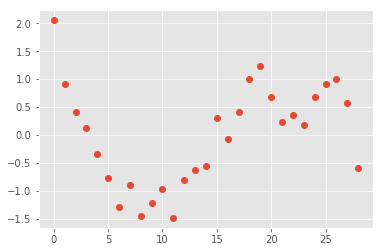

In [48]:
plt.plot(residuals,'o')

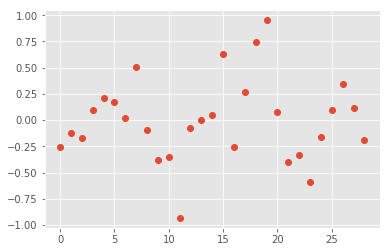

In [49]:
plt.plot(residuals_nl,'o')

In [93]:
np.mean(residuals)

-1.5691152081368879e-15

In [95]:
np.mean(residuals_nl)

-7.340351733849578e-10

(array([4., 4., 3., 1., 3., 5., 5., 4., 0., 1.]),
 array([-1.50202526, -1.1590024 , -0.81597953, -0.47295666, -0.1299338 ,
         0.21308907,  0.55611194,  0.8991348 ,  1.24215767,  1.58518053,
         1.9282034 ]),
 <a list of 10 Patch objects>)

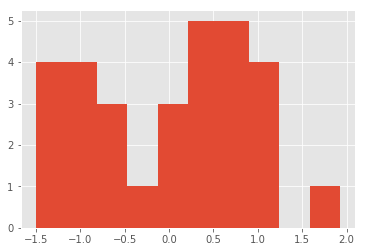

In [72]:
plt.hist(residuals)

(array([1., 1., 2., 5., 6., 7., 3., 1., 2., 1.]),
 array([-0.93153955, -0.74318895, -0.55483836, -0.36648776, -0.17813716,
         0.01021344,  0.19856404,  0.38691464,  0.57526524,  0.76361583,
         0.95196643]),
 <a list of 10 Patch objects>)

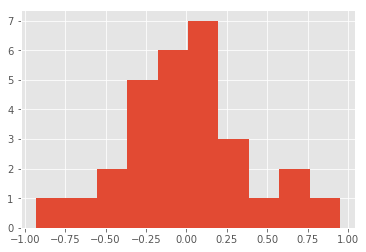

In [73]:
plt.hist(residuals_nl)

10


Text(0,0.5,'$r_k$')

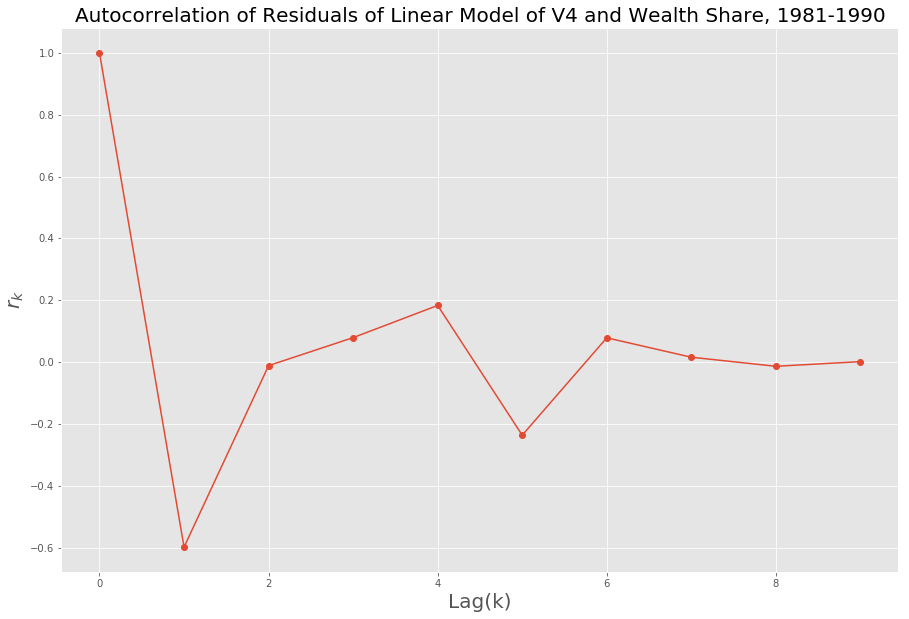

In [50]:
residuals1981_1990=wealth_share1981_1990-y1981_1990
print(len(residuals1981_1990))
plt.figure(figsize=(15,10))
N=len(residuals1981_1990)
k=range(int(N))
plt.plot(k,AUT1(residuals1981_1990),'-o')
plt.title('Autocorrelation of Residuals of Linear Model of V4 and Wealth Share, 1981-1990',fontsize=20)
plt.xlabel('Lag(k)', fontsize=20)
plt.ylabel(r'$r_k$', fontsize=20)

In [51]:
durbin_watson(residuals1981_1990)

3.1927442060513

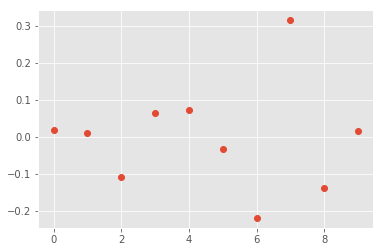

In [82]:
plt.plot(residuals1981_1990,'o')

(array([1., 1., 1., 1., 3., 2., 0., 0., 0., 1.]),
 array([-0.21847707, -0.16517393, -0.11187079, -0.05856765, -0.0052645 ,
         0.04803864,  0.10134178,  0.15464492,  0.20794806,  0.2612512 ,
         0.31455434]),
 <a list of 10 Patch objects>)

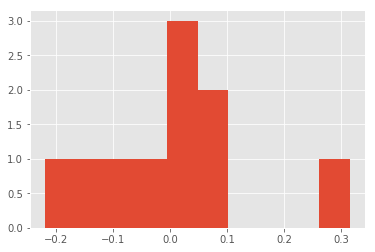

In [83]:
plt.hist(residuals1981_1990)

19


Text(0,0.5,'$r_k$')

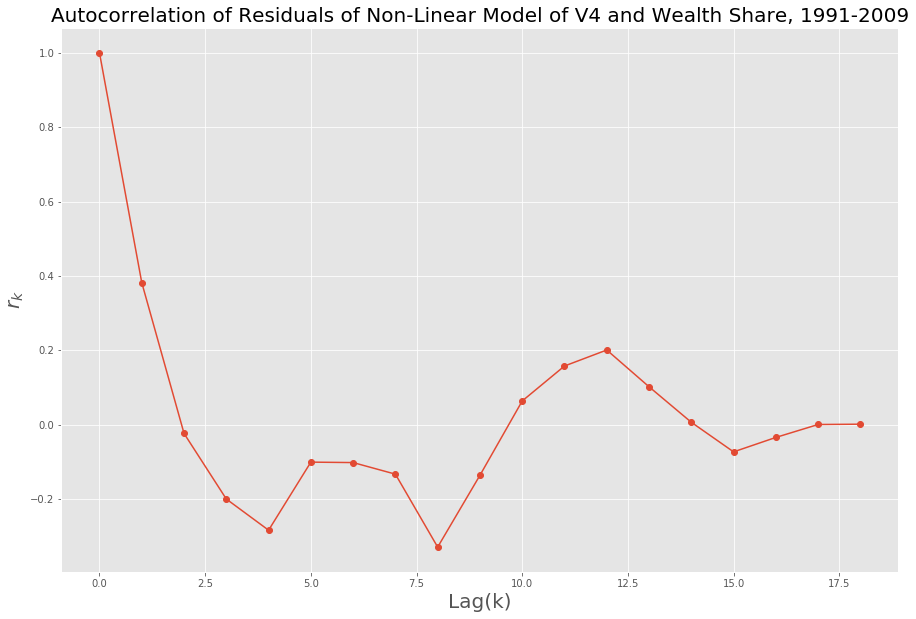

In [53]:
residuals1991_2009=wealth_share1991_2009-y1991_2009
print(len(residuals1991_2009))
plt.figure(figsize=(15,10))
N=len(residuals1991_2009)
k=range(int(N))
plt.plot(k,AUT1(residuals1991_2009),'-o')
plt.title('Autocorrelation of Residuals of Non-Linear Model of V4 and Wealth Share, 1991-2009',fontsize=20)
plt.xlabel('Lag(k)', fontsize=20)
plt.ylabel(r'$r_k$', fontsize=20)

In [104]:
durbin_watson(residuals1991_2009)

1.2118700967292189

(array([1., 1., 2., 3., 1., 6., 2., 0., 2., 1.]),
 array([-0.88928092, -0.71025765, -0.53123438, -0.3522111 , -0.17318783,
         0.00583544,  0.18485871,  0.36388199,  0.54290526,  0.72192853,
         0.9009518 ]),
 <a list of 10 Patch objects>)

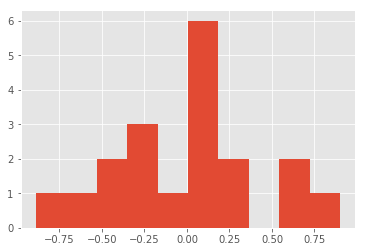

In [85]:
plt.hist(residuals1991_2009)

http://arch.readthedocs.io/en/latest/unitroot/unitroot_examples.html

In [88]:
import arch
from arch.unitroot import ADF
import statsmodels.api as sm

adf = ADF(V4)

# print('{0:0.4f}'.format(adf.stat)) # rounds to 4 decimal places

# print('{0:0.4f}'.format(adf.pvalue))

# adf.lags

# adf.trend='ct'
# print('{0:0.4f}'.format(adf.stat))

# print('{0:0.4f}'.format(adf.pvalue))

print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -0.401
P-value                         0.910
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.57 (1%), -2.92 (5%), -2.60 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [89]:
adf=ADF(V4_1981_1990)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -0.000
P-value                         0.959
Lags                                7
-------------------------------------

Trend: Constant
Critical Values: -20.83 (1%), -10.37 (5%), -4.04 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/home/samuel/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [90]:
reg_res = adf.regression
print(reg_res.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Fri, 27 Jul 2018   Prob (F-statistic):                nan
Time:                        14:05:13   Log-Likelihood:                 69.943
No. Observations:                   2   AIC:                            -135.9
Df Residuals:                       0   BIC:                            -138.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0647        inf         -0        n

/home/samuel/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  "samples were given." % int(n), ValueWarning)
/home/samuel/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1392: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/home/samuel/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1392: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/home/samuel/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1400: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid


In [118]:
adf=ADF(time_dif(time_dif(wealthshare_dif)))
#adf.trend='ct'
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -5.439
P-value                         0.000
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: -3.62 (1%), -2.94 (5%), -2.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


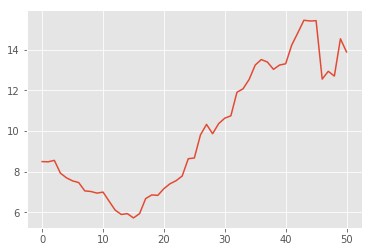

In [85]:
plt.plot(wealth_share)

http://www.statsmodels.org/devel/generated/statsmodels.tsa.stattools.adfuller.html

In [132]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(V4_dif)
result

(-2.5007252801338526,
 0.1152979559898682,
 7,
 42,
 {'1%': -3.596635636000432,
  '10%': -2.6049909750566895,
  '5%': -2.933297331821618},
 -33.61037272052134)

In [111]:
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.500725
p-value: 0.115298
Critical Values:
	1%: -3.597
	5%: -2.933
	10%: -2.605
